In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy import stats
from sklearn import datasets
import pandas as pd
import numpy as np


df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


https://archive.ics.uci.edu/dataset/53/iris

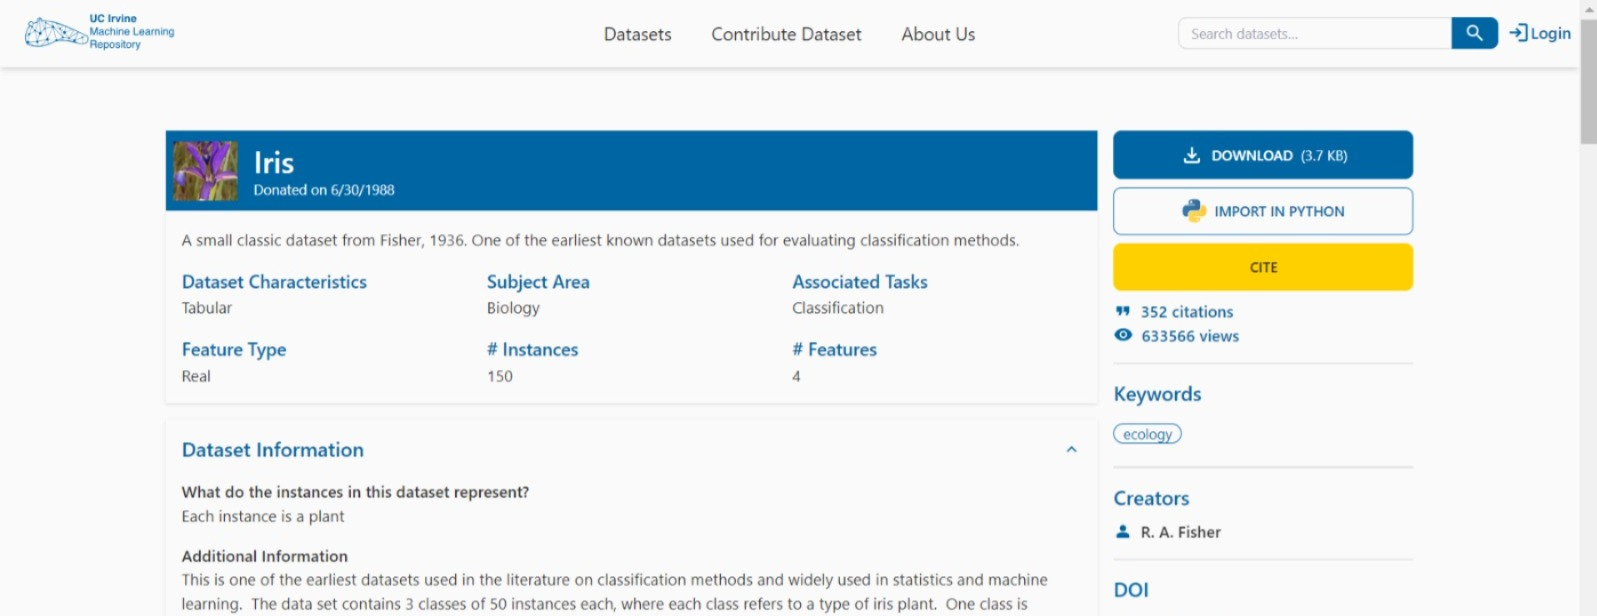

Business Understanding

    1.Hendak dibangun sistem identifikasi Jenis Buka Iris
    2.Menggunakan data sekunder yang sudah memiliki label
    3.Data ini memuat 4 fitur Dimana salah satu diantaranya adalah label data
    4.Terdapat 150 nilai (instance) data.


# Data Understanding - EDA

EDA terdiri atas
1. Memahami Data: Memahami mana explanatory variable, mana targeted output (jika ada), melakukan pengecekan tipe data, melakukan pengecekan missing value, cek jumlah data tiap kelas cek outlier (data numerik)
2. Anomali data: cek jika ada nilai data yang tidak sesuai dengan yang seharusnya
3. Identifikasi Deskriptive statistik (central tendency measurement: mean, median, mode) yang dapat digunakan untuk penangan missing value. Karena kasus klasifikasi maka mempelajari trend tidak diperlukan.
4. Feature Importance (menganalisa faktor yang siginifikan) (sementara ini tidak diperlukan, tidak dievaluasi)


In [2]:
#1. Memahami Data
df.info()
#dari data dan context permasalahan yang diberikan maka input data memiliki dimensi 5x150, sehingga dapat diartika terdapat 34 explanatori variable
# Target merupakan targeted output yang berupa data kategori (tipe data object) yang merupakan nama jenis bunga iris
# pemodelan yang tepat adalah model klasifikasi


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
#cek missing value
#tidak terdapat missing value
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [37]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#cek jumlah data tiap kelas
df.groupby('species').size()
#tidak terdapat kasus imbalansi data

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Pre-processing Data

Pre-processing data
1. Penanganan Missing value pada caling dan itching
2. Cek outlier (skip)
3. encoding targeted output (tidak perlu)
4. standarisasi data
5. penanganan imbalance dataset (tidak perlu)
6. Split data menjadi data training dan testing

In [5]:
# 4.standarisasi data
# terlebih dahulu definisikan X dan y
X = df.drop('species', axis=1)
y = df["species"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
#6. penanganan imbalance dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X, y,test_size= 0.3, random_state = 100)


Data sudah siap untuk dimodelkan

# PEMODELAN menggunakan dua algoritma machine learning (SVM, KNN)

In [7]:
from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

#clf3 = KNeighborsClassifier(n_neighbors=1)
#clf3.fit(X_test,y_test)



SVC(kernel='linear')

In [19]:
#test the three models with the test data and print their accuracy scores
#print('svm: {}'.format(clf.score(X_test, y_test)))
#print('knn: {}'.format(clf3.score(X_test, y_test)))

svm: 0.9777777777777777
knn: 1.0


In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_test_pred = svc.predict(X_test)
print(classification_report(y_test, y_test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [10]:
import pickle as pkl

In [11]:
file_name = "svc.pkl"
pkl.dump(svc,open(file_name,'wb'))

In [12]:
print(pd.__version__)

2.0.3


In [13]:
print(np.__version__)

1.25.0
